<a href="https://colab.research.google.com/github/Seavleu/Supervise_Unsupervise-Learning/blob/main/fcc_MAGIC_SuperviseLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Dataset Information
Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [ ]:
cols = ['fLength', 'fWidth', 'fSize','fConc', 'fConcl', 'fAsym', 'fM3Long', 'fM3Trans','fAlpha', 'fDist', 'class' ]
df = pd.read_csv('/content/magic04.data', names=cols)

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConcl     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df['class'] = (df['class'] == "g").astype(int)

df.head(2)

fLength   fWidth   fSize   fConc  fConcl    fAsym  fM3Long  fM3Trans  \
0  28.7967  16.0021  2.6449  0.3918  0.1982  27.7004  22.0110   -8.2027   
1  31.6036  11.7235  2.5185  0.5303  0.3773  26.2722  23.8238   -9.9574   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1

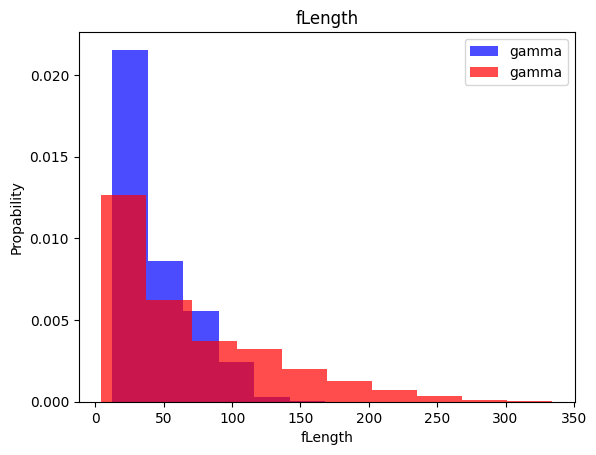

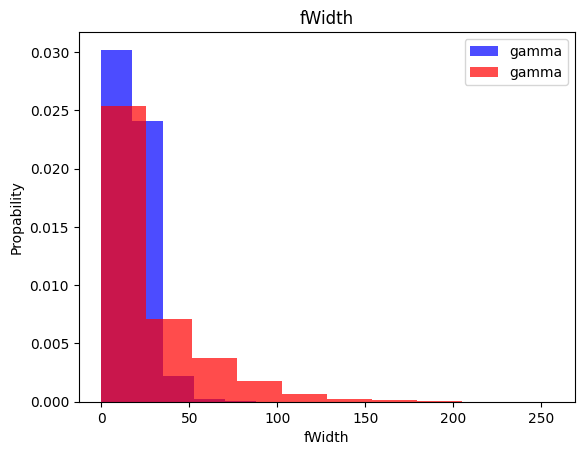

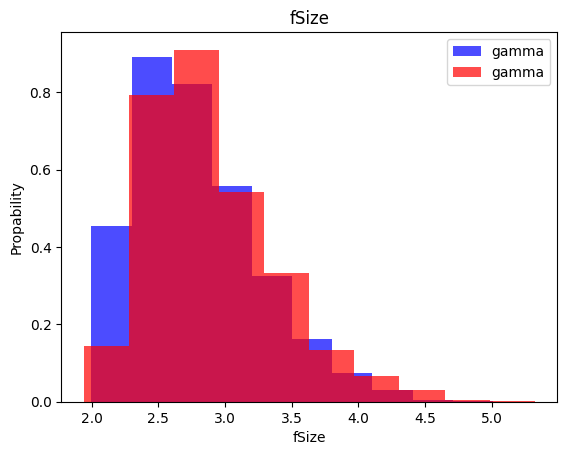

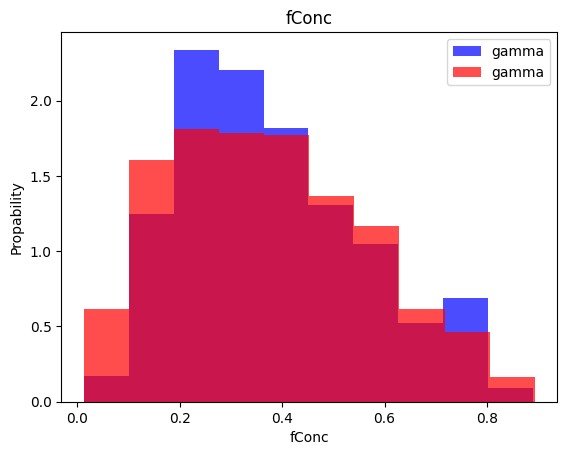

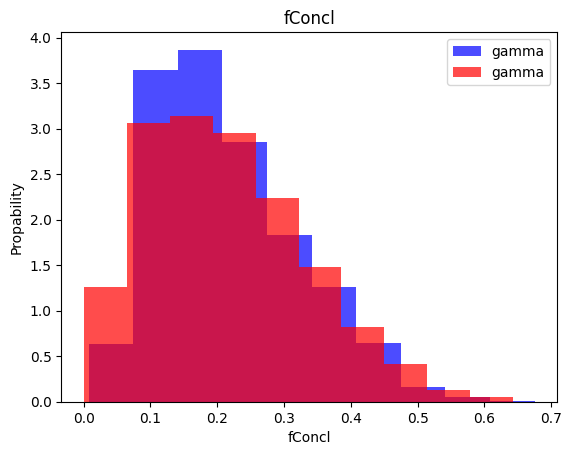

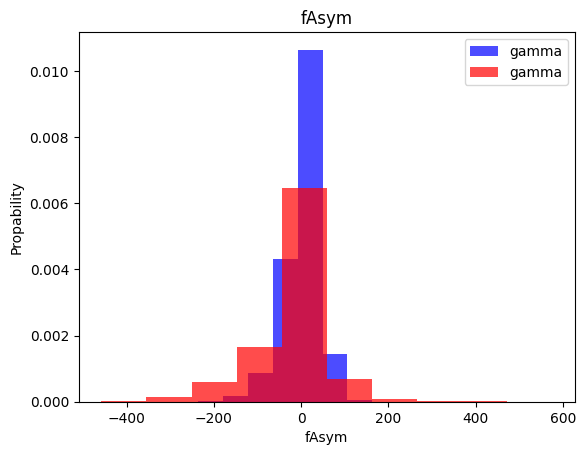

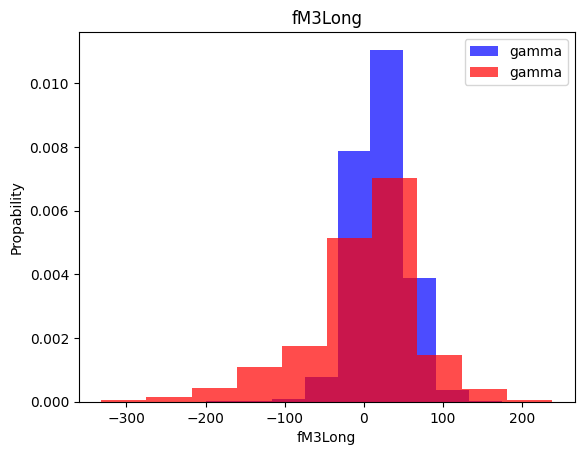

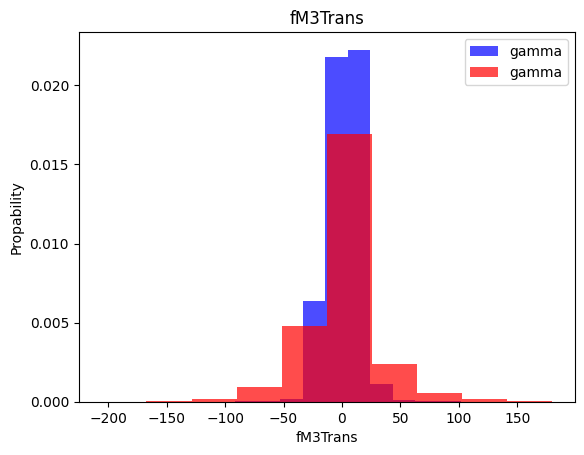

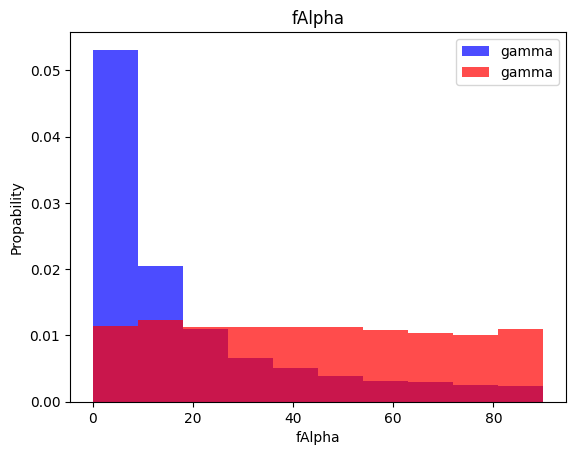

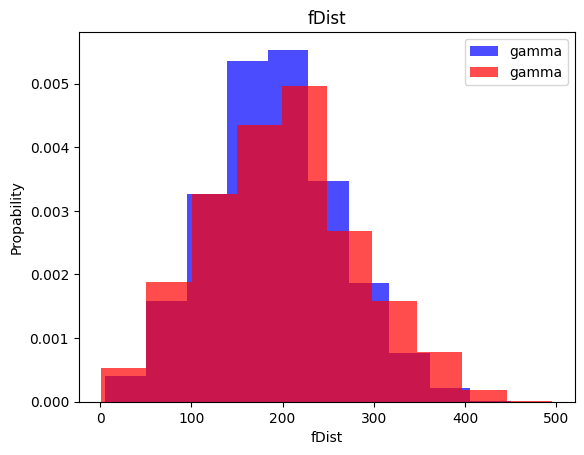

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df['class']== 1][label], color='blue', label='gamma', alpha= 0.7, density=True)
  plt.hist(df[df['class']== 0][label], color='red', label='gamma', alpha= 0.7, density=True)
  plt.title(label)
  plt.ylabel("Propability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train, validation, test dataset

In [ ]:
def scale_dataset(dataframe, oversample=False):
    y = dataframe[dataframe.columns[-1]].values
    X = dataframe[dataframe.columns[:-1]].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X_scaled, y = ros.fit_resample(X_scaled, y)

    data = np.hstack((X_scaled, np.reshape(y, (-1, 1))))

    return data, X_scaled, y

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=True)
test, X_test, y_test = scale_dataset(test, oversample=False)

# KNN
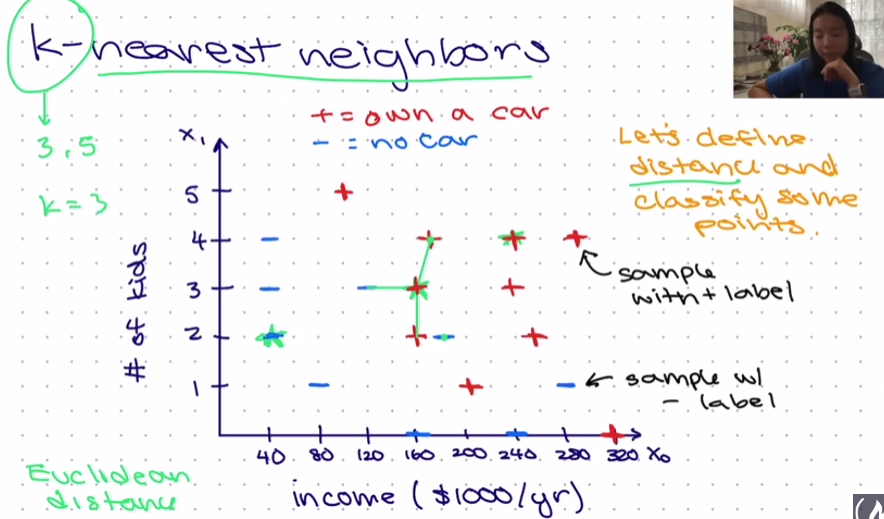

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit = (X_train, y_train)

knn_model

KNeighborsClassifier(n_neighbors=1)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialize the KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Fit the model with training data
knn_model.fit(X_train_scaled, y_train)

# Now you can make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72      1363
           1       0.84      0.86      0.85      2441

    accuracy                           0.80      3804
   macro avg       0.79      0.78      0.79      3804
weighted avg       0.80      0.80      0.80      3804



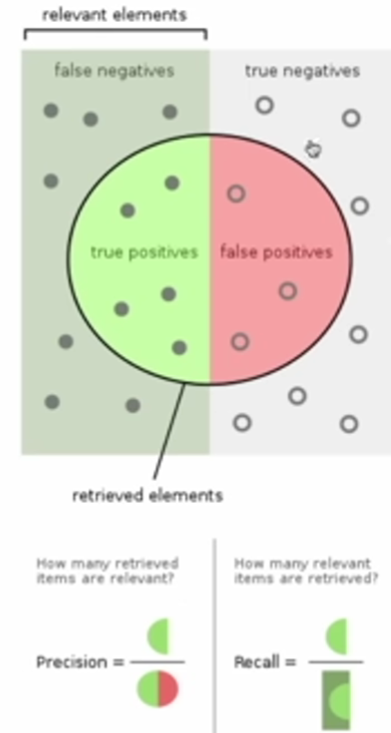

# Naive Bayes
What is the propability of having covid given a positive test?
-> P(covid/+test) = 531/551 = 96.4%

        -    +
    |Y| 531 | 6   | = 537
    |N| 20 | 9943 | = 9463
    Total 551 9449
- Y+ : Ppl who tested postive and has covid
- Y- : Ppl who tested negative but has covid
- N+ : Ppl who tested postive and doesn't has covid
- N- : Ppl who tested negative but doesn't has covid

Bayes Rule
p(A|B) = P(B|A)*P(A)/P(B)

P(FP) = 0.05
P(FN) = 0.01
P(disease) = 0.1
P(disease|(+)test) = ?




In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50      1363
           1       0.73      0.90      0.80      2441

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



# Logistic Regression
sigmoid func()

- simple log reg. : X0
-  multiple log reg. : X0, X1, X2 ... Xn

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1363
           1       0.83      0.81      0.82      2441

    accuracy                           0.77      3804
   macro avg       0.75      0.76      0.75      3804
weighted avg       0.77      0.77      0.77      3804



# Support Vector Machines (SVM)
Seperate between the dataset by a line. Priority the largest margins. Issue: not robusted with outliers.
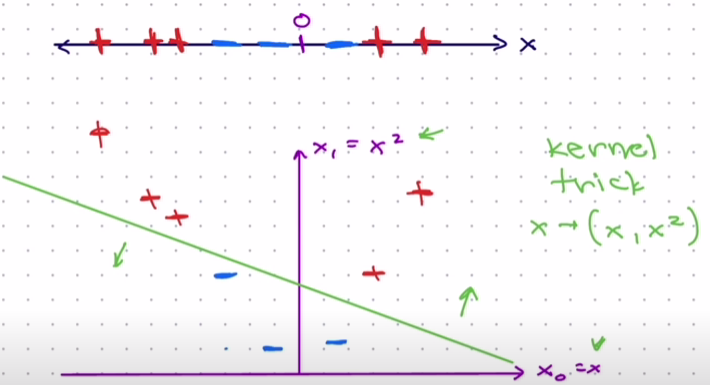

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1363
           1       0.88      0.89      0.89      2441

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



### Best model performance is the "SVM" which achieves 86% accuracy

# NN
A neural network is a computational model inspired by the structure and function of the human brain. It consists of layers of interconnected nodes, known as neurons or artificial neurons. Each connection between neurons has an associated weight, and these weights are adjusted during training to allow the network to learn patterns from the input data.

## **Activation Function:**
The activation function introduces non-linearity to the neural network. Without activation functions, the entire neural network would behave like a single-layer linear regression model, regardless of its depth. Activation functions enable neural networks to learn complex patterns and relationships in data.

Sigmoid/Logistic Activation Function: Commonly used in binary or multiclass classification problems. It squashes the output between 0 and 1, representing probabilities.

Tanh Activation Function: Similar to the sigmoid but maps the output between -1 and 1. It can be useful in certain situations, especially when the data has negative values.

ReLU (Rectified Linear Unit) Activation Function: A popular choice that outputs the input directly if it is positive; otherwise, it outputs zero. It is computationally efficient and helps with the vanishing gradient problem.

## **Backpropagation:**
Backpropagation is the optimization algorithm used to train neural networks. It involves adjusting the weights of the connections based on the gradient of the loss function with respect to the weights. The process involves:

**Forward Pass:** The input data is passed through the network, and the output is calculated.

**Loss Calculation:** The difference between the predicted output and the true output is measured using a loss function.

**Backward Pass (Backpropagation):** The gradient of the loss function with respect to each weight is computed through the chain rule of calculus.

**Weight Update:** The weights are updated in the opposite direction of the gradient, using an optimization algorithm (e.g., gradient descent).

**Loss Function**
The loss function measures the difference between the predicted output and the true output. The goal during training is to minimize this loss. Different tasks (e.g., classification, regression) may use different loss functions. For binary classification problems, the binary crossentropy loss is commonly used.

weights (W0, W1, W3...Wn) aligns with the parameters in the neural network, which are adjusted during training to minimize the loss.

In [ ]:
# Tensorflow
import tensorflow as tf

In [ ]:
def plot_loss(history):
  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 4))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'], label ='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
 # ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'], label ='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
 # plt.legend()
  ax2.grid(True)

  plt.show()

#def plot_accuracy(history):
# plt.plot(history.history['accuracy'],label='accuracy')
#  plt.plot(history.history['val_accuracy'], label ='val_accuracy')
#  plt.xlabel('Epoch')
#  plt.ylabel('Accuracy')
#  plt.legend()
#  plt.grid(True)
#  plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),  # Randomly sets input units to 0 during training to prevent overfitting.
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),  # Separate the layers with a comma
        tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
    ])

    # Use 'compile' to configure the learning process with Adam optimizer and specified learning rate
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return nn_model, history

In [ ]:
#history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

16 nodes, dropout 0, lr 0.1, batch size 32, epochs 100


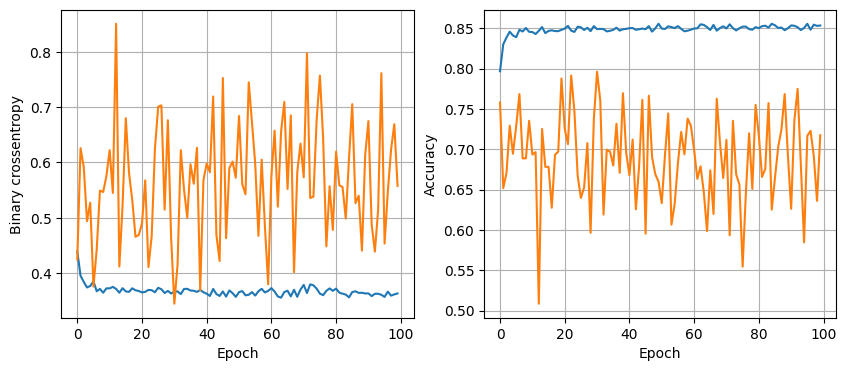

157/157 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.8366
16 nodes, dropout 0, lr 0.1, batch size 64, epochs 100


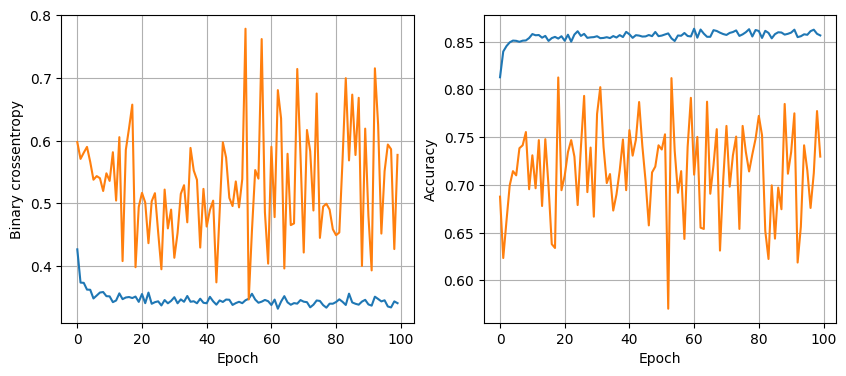

157/157 [==============================] - 0s 2ms/step - loss: 0.3582 - accuracy: 0.8470
16 nodes, dropout 0, lr 0.1, batch size 128, epochs 100


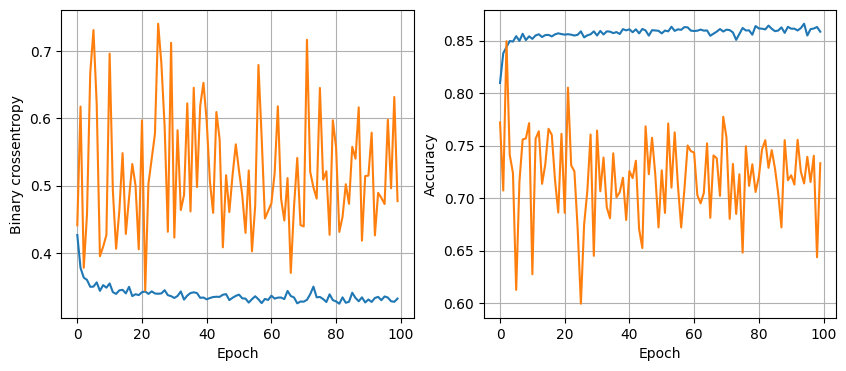

157/157 [==============================] - 0s 2ms/step - loss: 0.3442 - accuracy: 0.8380
16 nodes, dropout 0, lr 0.005, batch size 32, epochs 100


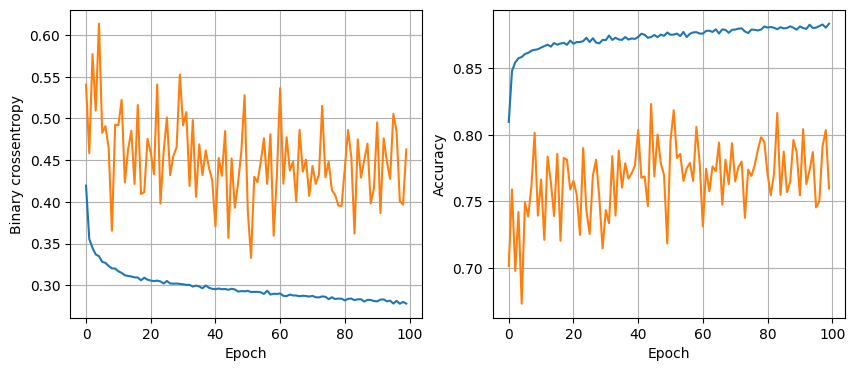

157/157 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8554
16 nodes, dropout 0, lr 0.005, batch size 64, epochs 100


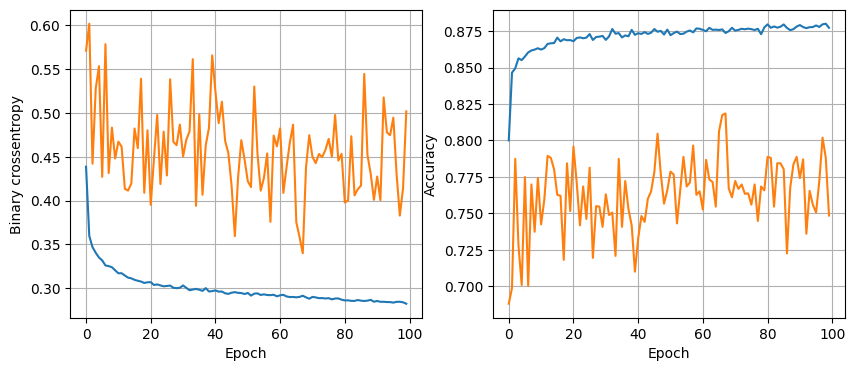

157/157 [==============================] - 0s 2ms/step - loss: 0.3311 - accuracy: 0.8486
16 nodes, dropout 0, lr 0.005, batch size 128, epochs 100


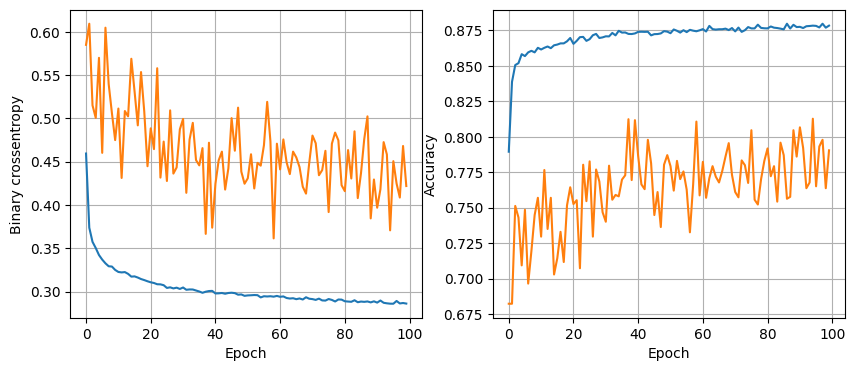

157/157 [==============================] - 0s 2ms/step - loss: 0.3241 - accuracy: 0.8546
16 nodes, dropout 0, lr 0.001, batch size 32, epochs 100


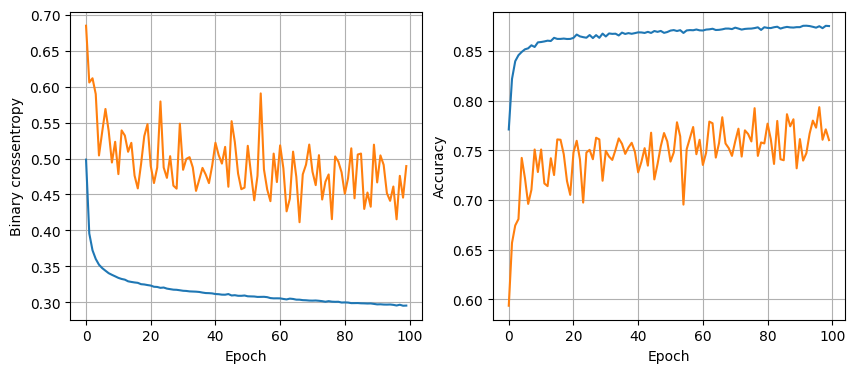

157/157 [==============================] - 0s 3ms/step - loss: 0.3186 - accuracy: 0.8532
16 nodes, dropout 0, lr 0.001, batch size 64, epochs 100


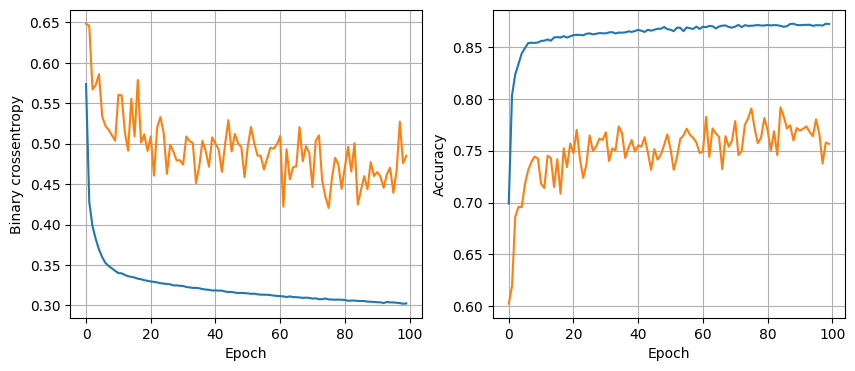

157/157 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.8476
16 nodes, dropout 0, lr 0.001, batch size 128, epochs 100


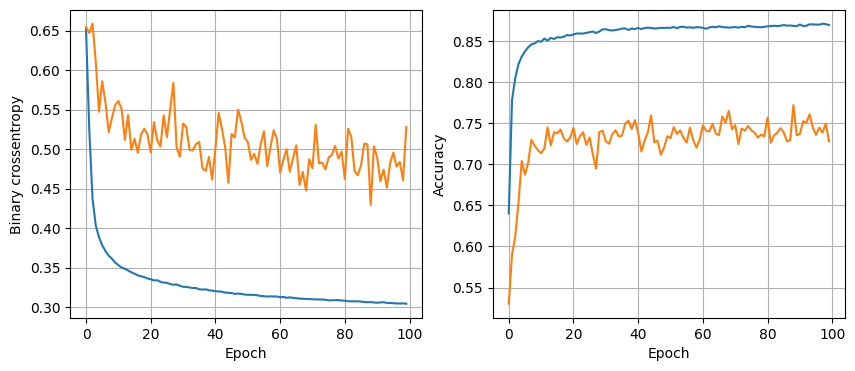

157/157 [==============================] - 0s 3ms/step - loss: 0.3309 - accuracy: 0.8500
16 nodes, dropout 0.2, lr 0.1, batch size 32, epochs 100


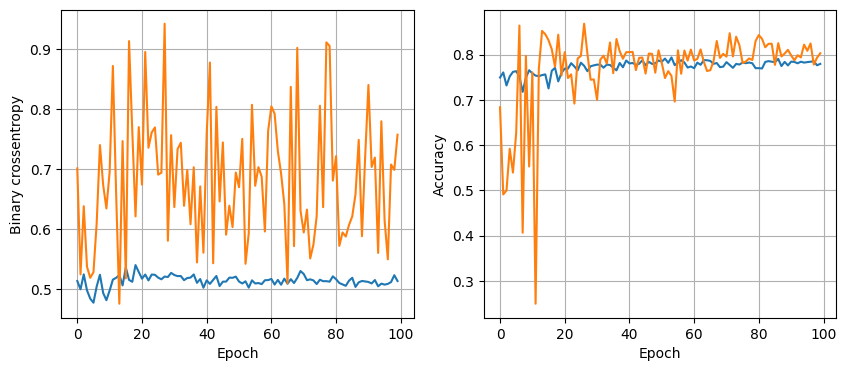

157/157 [==============================] - 0s 2ms/step - loss: 0.5196 - accuracy: 0.7974
16 nodes, dropout 0.2, lr 0.1, batch size 64, epochs 100


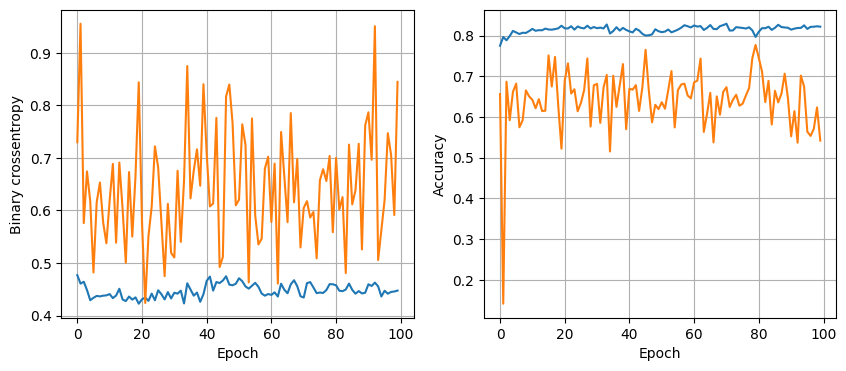

157/157 [==============================] - 0s 2ms/step - loss: 0.5211 - accuracy: 0.7699
16 nodes, dropout 0.2, lr 0.1, batch size 128, epochs 100


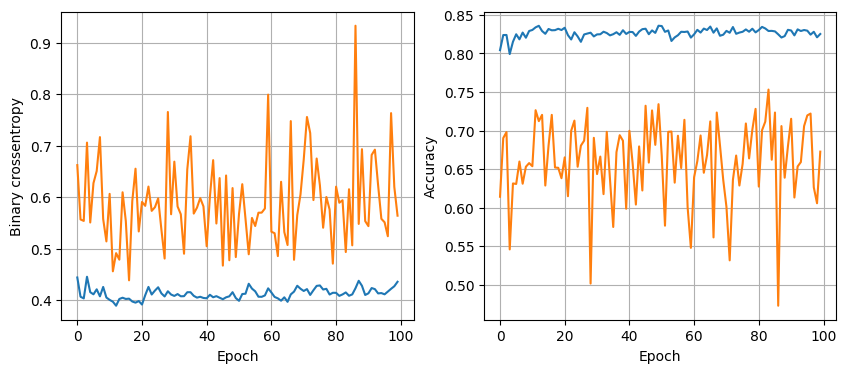

157/157 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.8280
16 nodes, dropout 0.2, lr 0.005, batch size 32, epochs 100


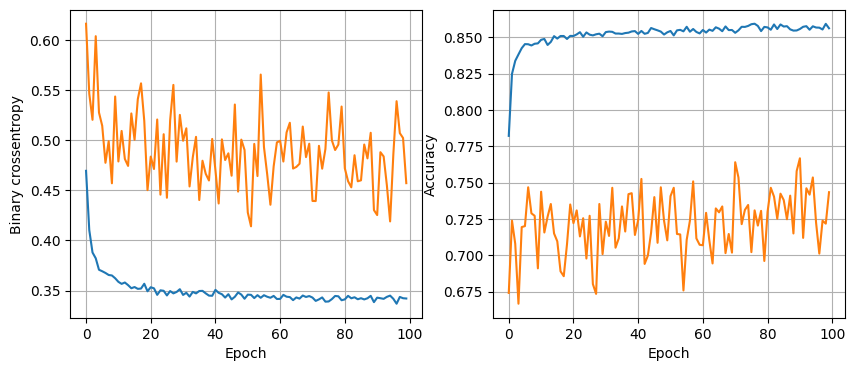

157/157 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8474
16 nodes, dropout 0.2, lr 0.005, batch size 64, epochs 100


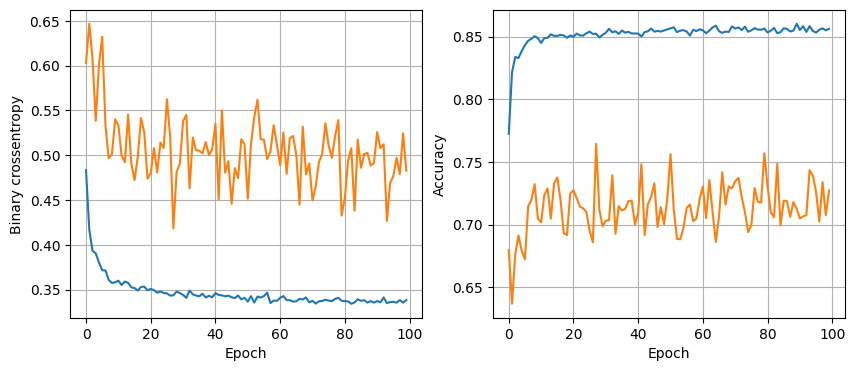

157/157 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8508
16 nodes, dropout 0.2, lr 0.005, batch size 128, epochs 100


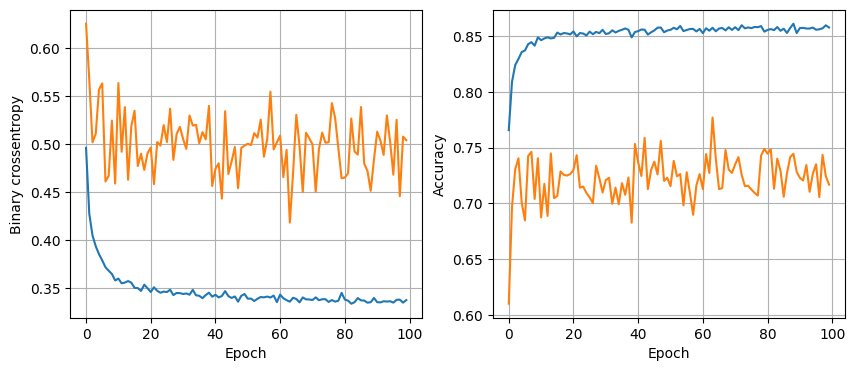

157/157 [==============================] - 1s 3ms/step - loss: 0.3397 - accuracy: 0.8378
16 nodes, dropout 0.2, lr 0.001, batch size 32, epochs 100


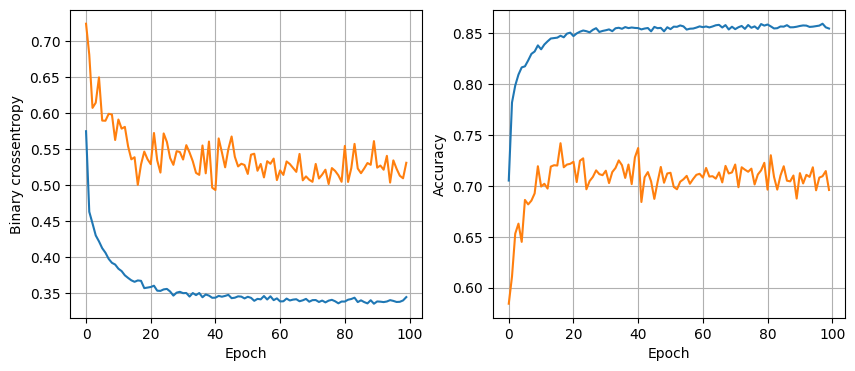

157/157 [==============================] - 0s 3ms/step - loss: 0.3429 - accuracy: 0.8410
16 nodes, dropout 0.2, lr 0.001, batch size 64, epochs 100


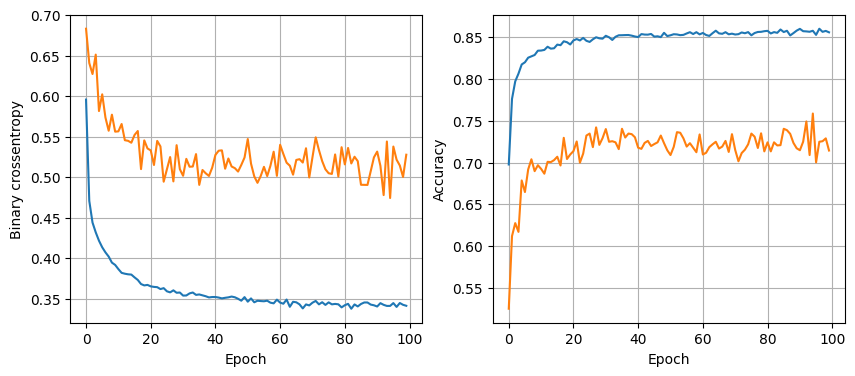

157/157 [==============================] - 0s 2ms/step - loss: 0.3434 - accuracy: 0.8454
16 nodes, dropout 0.2, lr 0.001, batch size 128, epochs 100


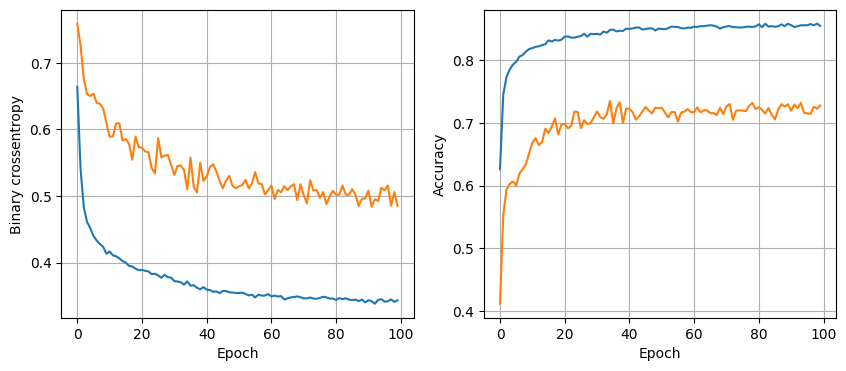

157/157 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.8468
32 nodes, dropout 0, lr 0.1, batch size 32, epochs 100


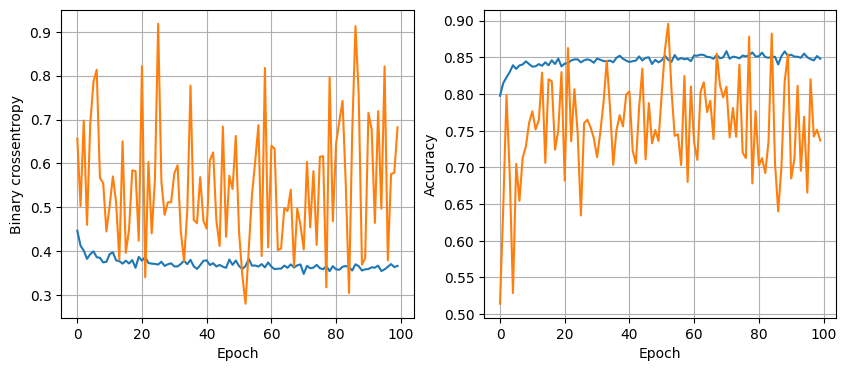

157/157 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8444
32 nodes, dropout 0, lr 0.1, batch size 64, epochs 100


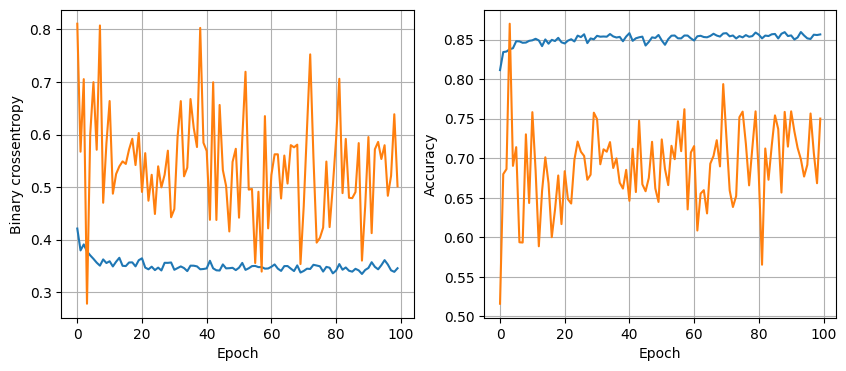

157/157 [==============================] - 1s 3ms/step - loss: 0.3602 - accuracy: 0.8466
32 nodes, dropout 0, lr 0.1, batch size 128, epochs 100


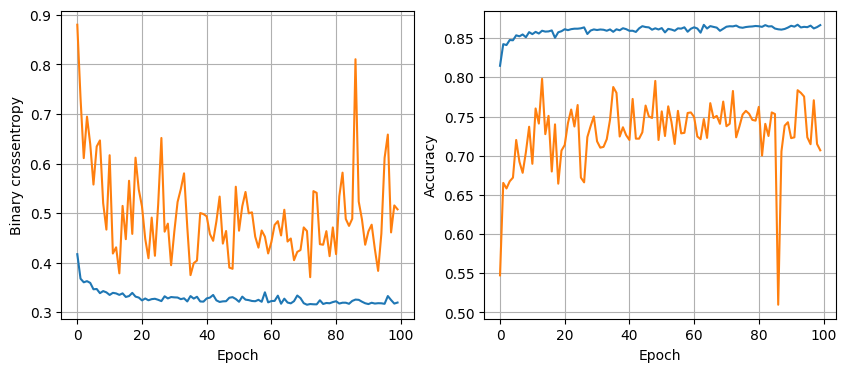

157/157 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.8446
32 nodes, dropout 0, lr 0.005, batch size 32, epochs 100


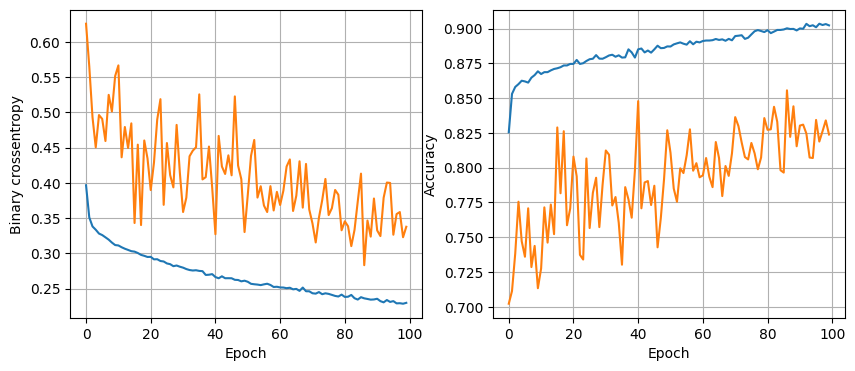

157/157 [==============================] - 0s 2ms/step - loss: 0.3779 - accuracy: 0.8530
32 nodes, dropout 0, lr 0.005, batch size 64, epochs 100


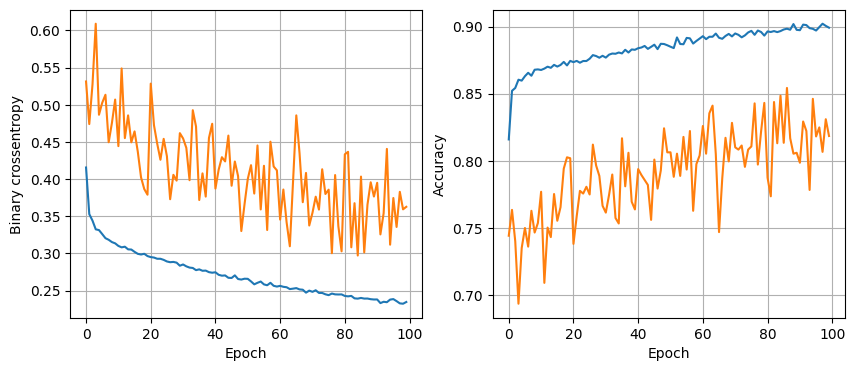

157/157 [==============================] - 0s 2ms/step - loss: 0.3610 - accuracy: 0.8564
32 nodes, dropout 0, lr 0.005, batch size 128, epochs 100


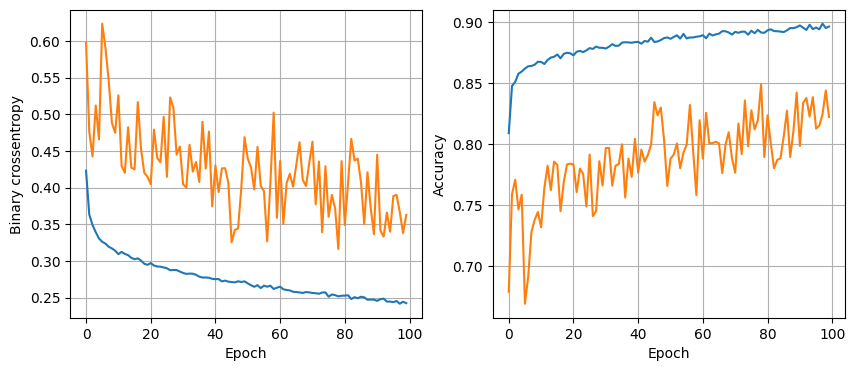

157/157 [==============================] - 1s 3ms/step - loss: 0.3375 - accuracy: 0.8622
32 nodes, dropout 0, lr 0.001, batch size 32, epochs 100


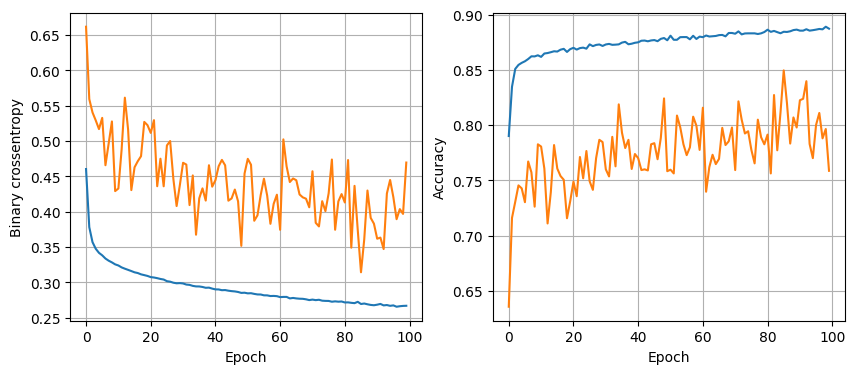

157/157 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8540
32 nodes, dropout 0, lr 0.001, batch size 64, epochs 100


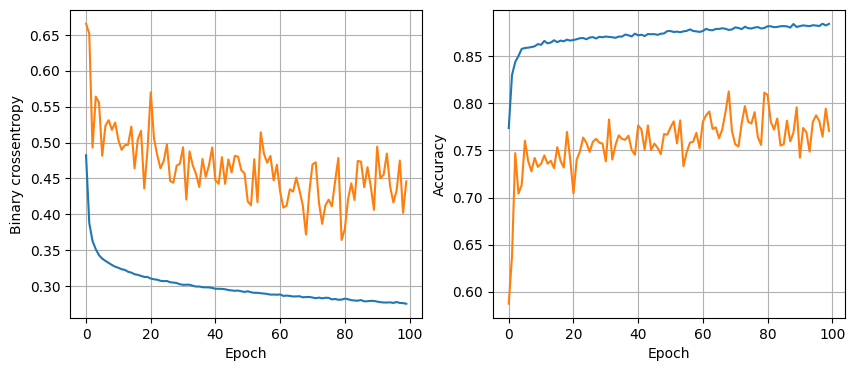

157/157 [==============================] - 0s 2ms/step - loss: 0.3310 - accuracy: 0.8572
32 nodes, dropout 0, lr 0.001, batch size 128, epochs 100


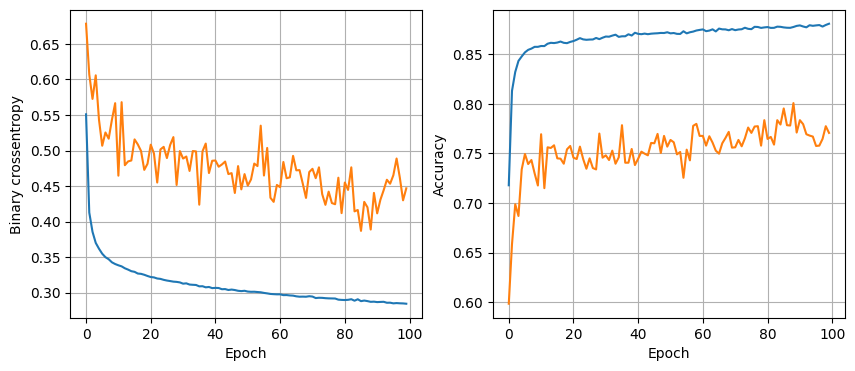

157/157 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8558
32 nodes, dropout 0.2, lr 0.1, batch size 32, epochs 100


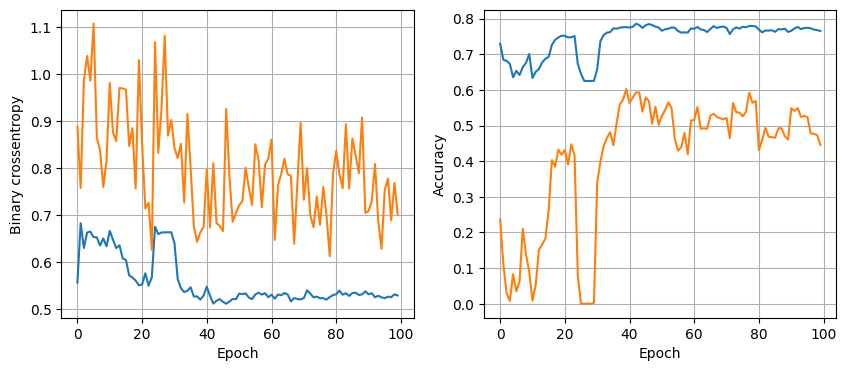

157/157 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.7261
32 nodes, dropout 0.2, lr 0.1, batch size 64, epochs 100


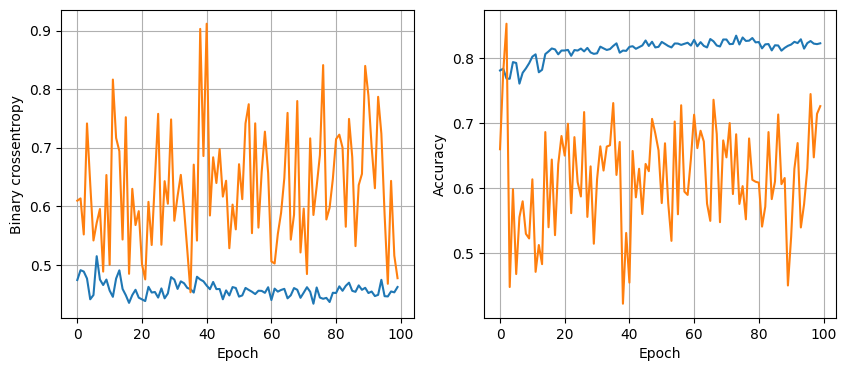

157/157 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.8344
32 nodes, dropout 0.2, lr 0.1, batch size 128, epochs 100


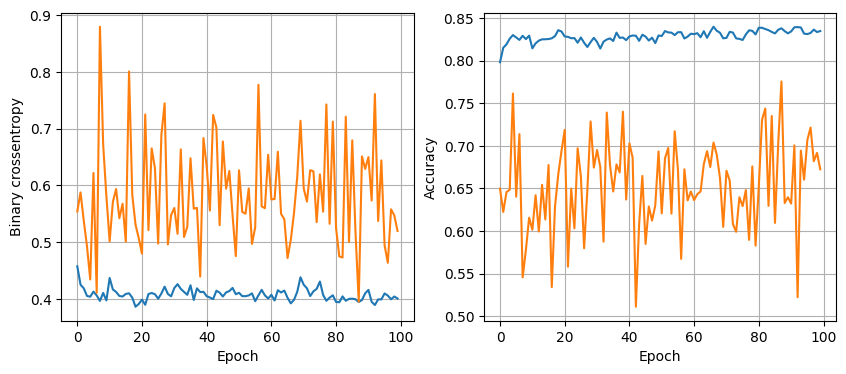

157/157 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8260
32 nodes, dropout 0.2, lr 0.005, batch size 32, epochs 100


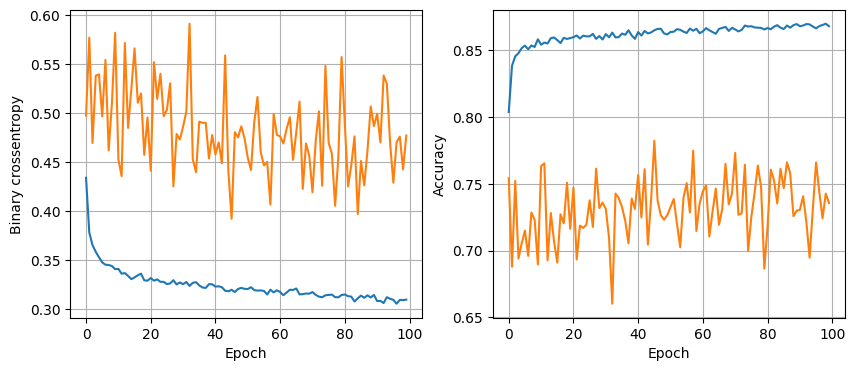

157/157 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8560
32 nodes, dropout 0.2, lr 0.005, batch size 64, epochs 100


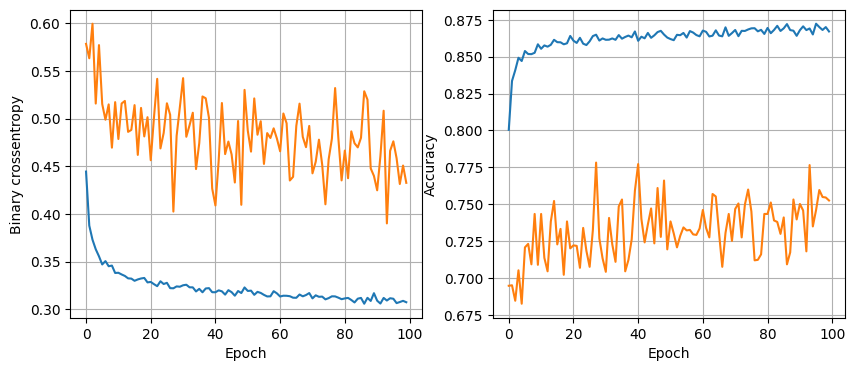

157/157 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8608
32 nodes, dropout 0.2, lr 0.005, batch size 128, epochs 100


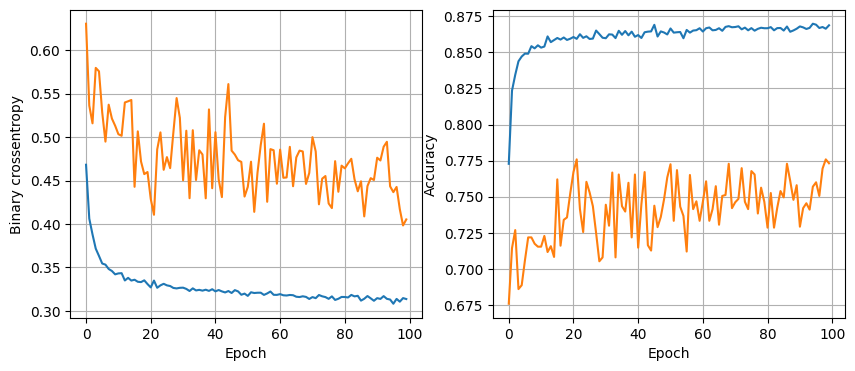

157/157 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.8588
32 nodes, dropout 0.2, lr 0.001, batch size 32, epochs 100


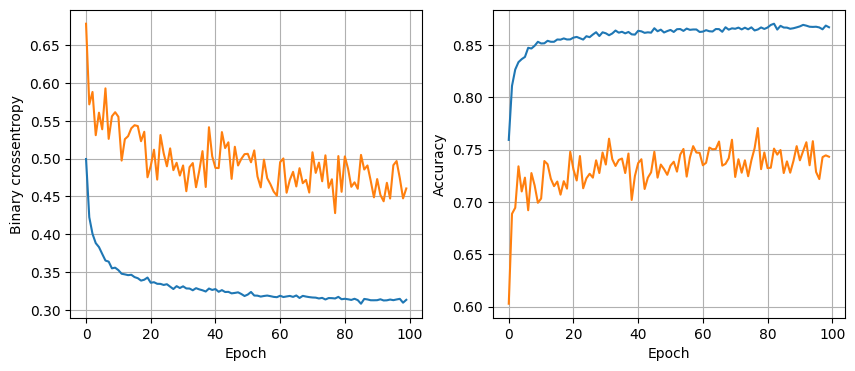

157/157 [==============================] - 0s 3ms/step - loss: 0.3234 - accuracy: 0.8558
32 nodes, dropout 0.2, lr 0.001, batch size 64, epochs 100


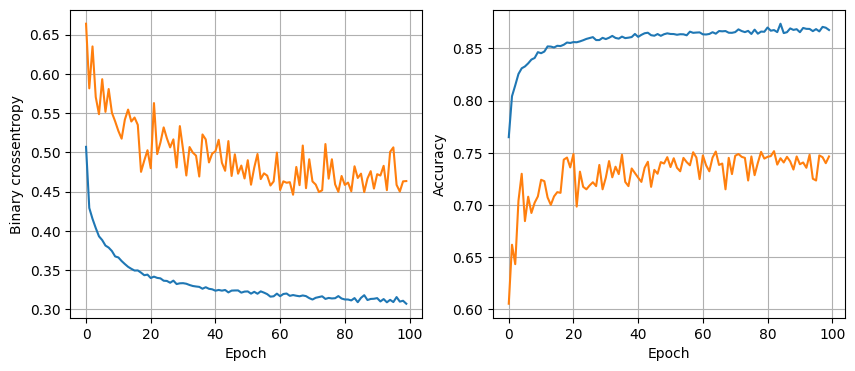

157/157 [==============================] - 0s 3ms/step - loss: 0.3180 - accuracy: 0.8578
32 nodes, dropout 0.2, lr 0.001, batch size 128, epochs 100


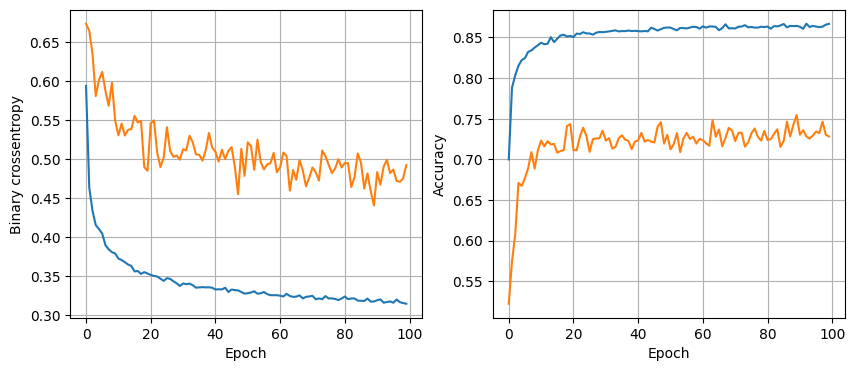

157/157 [==============================] - 0s 3ms/step - loss: 0.3250 - accuracy: 0.8556
64 nodes, dropout 0, lr 0.1, batch size 32, epochs 100


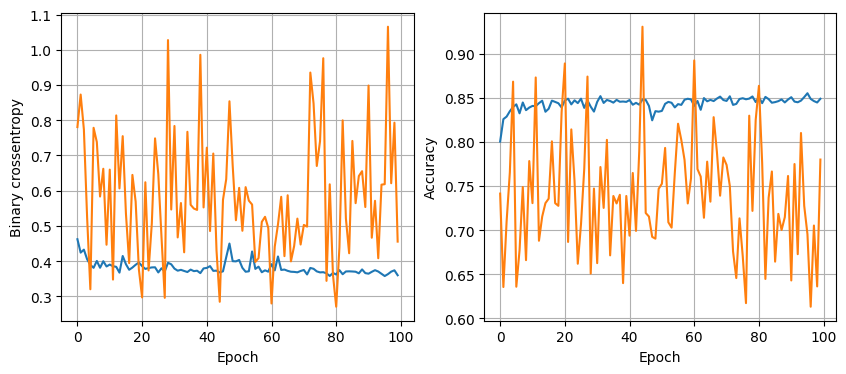

157/157 [==============================] - 0s 3ms/step - loss: 0.3678 - accuracy: 0.8382
64 nodes, dropout 0, lr 0.1, batch size 64, epochs 100


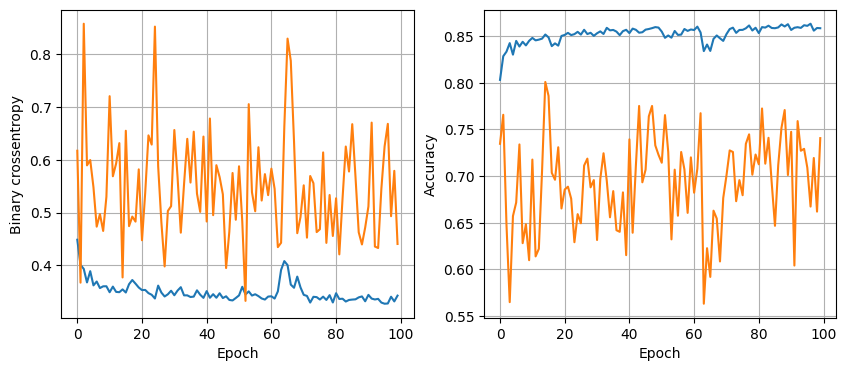

157/157 [==============================] - 0s 2ms/step - loss: 0.3476 - accuracy: 0.8432
64 nodes, dropout 0, lr 0.1, batch size 128, epochs 100


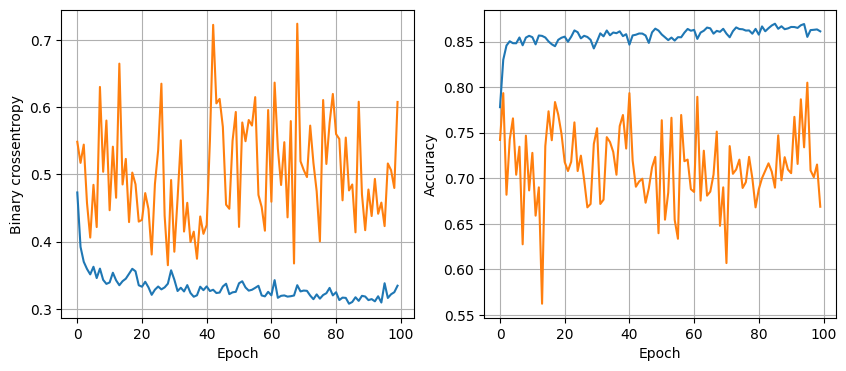

157/157 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8240
64 nodes, dropout 0, lr 0.005, batch size 32, epochs 100


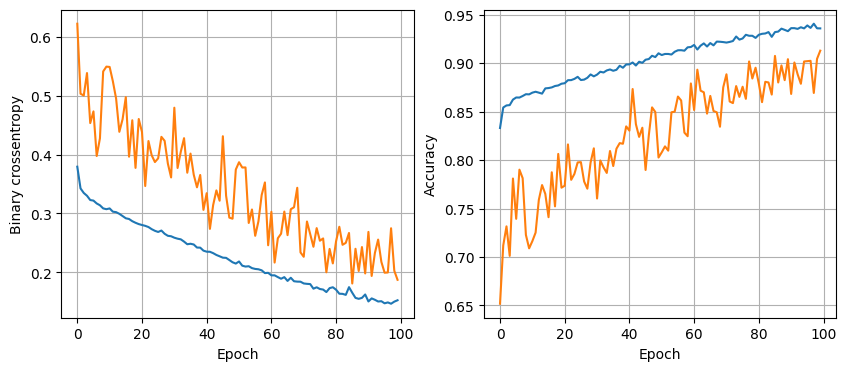

157/157 [==============================] - 0s 3ms/step - loss: 0.5958 - accuracy: 0.8526
64 nodes, dropout 0, lr 0.005, batch size 64, epochs 100


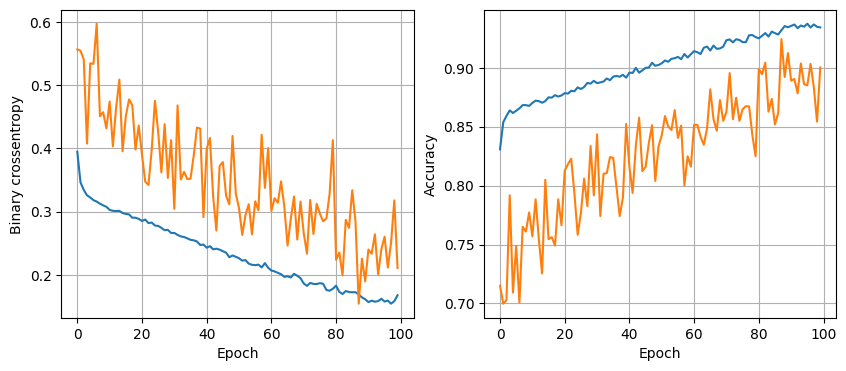

157/157 [==============================] - 1s 3ms/step - loss: 0.4978 - accuracy: 0.8490
64 nodes, dropout 0, lr 0.005, batch size 128, epochs 100


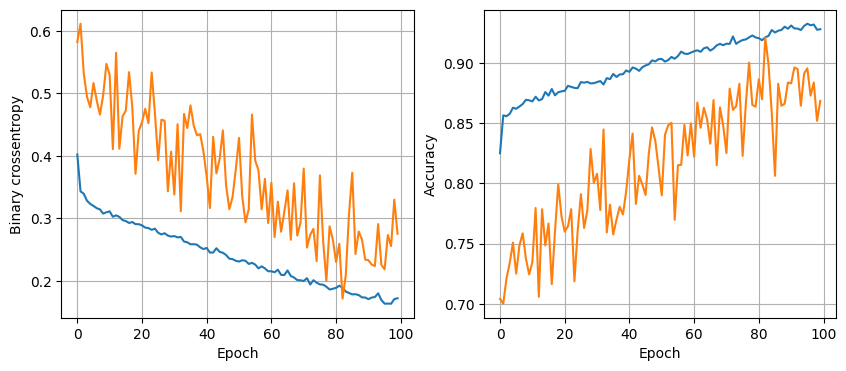

157/157 [==============================] - 0s 3ms/step - loss: 0.4984 - accuracy: 0.8492
64 nodes, dropout 0, lr 0.001, batch size 32, epochs 100


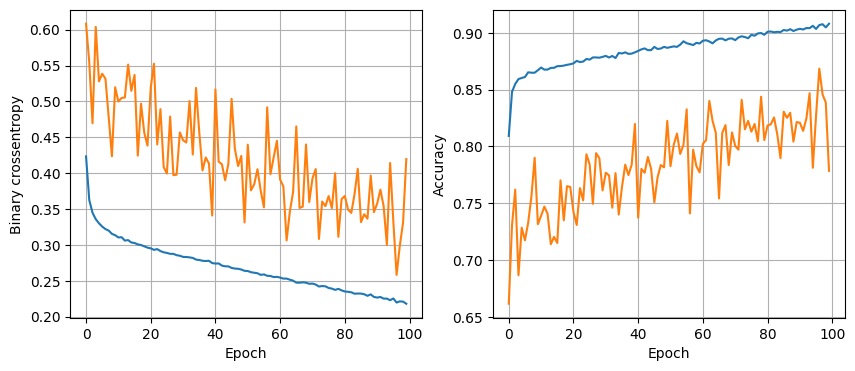

157/157 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8426
64 nodes, dropout 0, lr 0.001, batch size 64, epochs 100


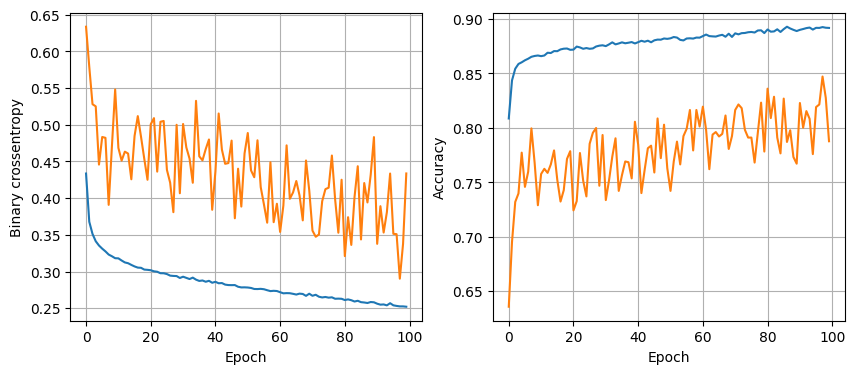

157/157 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.8550
64 nodes, dropout 0, lr 0.001, batch size 128, epochs 100


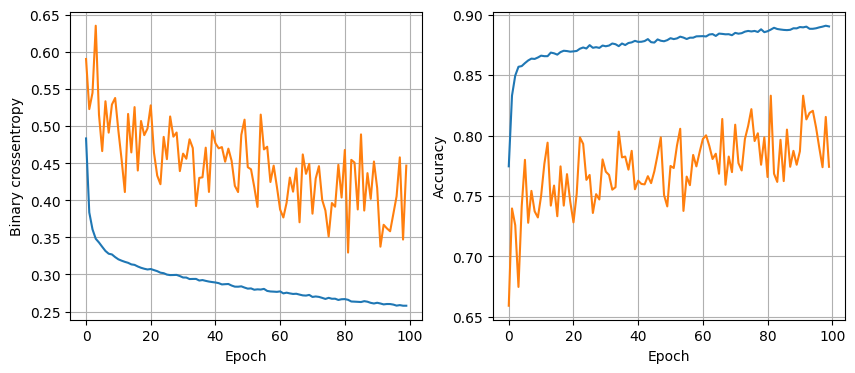

157/157 [==============================] - 0s 2ms/step - loss: 0.3417 - accuracy: 0.8502
64 nodes, dropout 0.2, lr 0.1, batch size 32, epochs 100


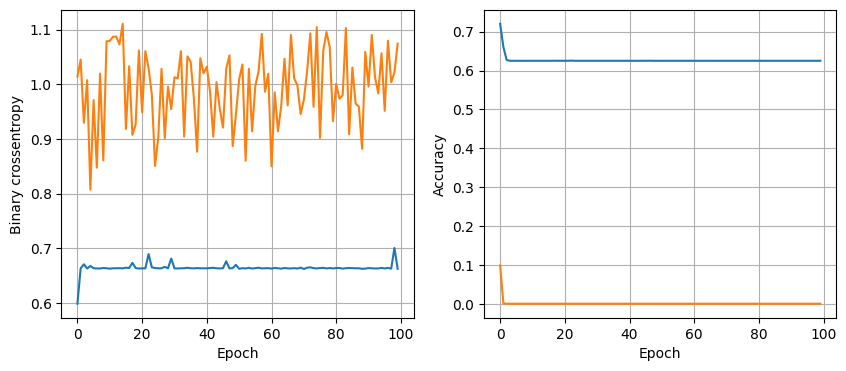

157/157 [==============================] - 0s 3ms/step - loss: 0.7461 - accuracy: 0.5000
64 nodes, dropout 0.2, lr 0.1, batch size 64, epochs 100


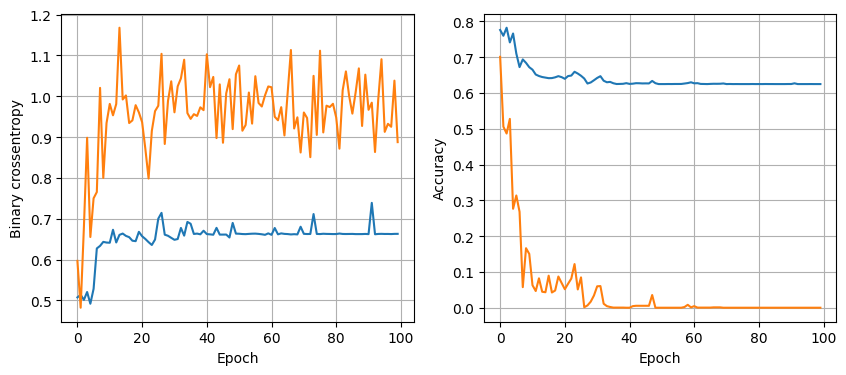

157/157 [==============================] - 0s 2ms/step - loss: 0.7090 - accuracy: 0.5000
64 nodes, dropout 0.2, lr 0.1, batch size 128, epochs 100


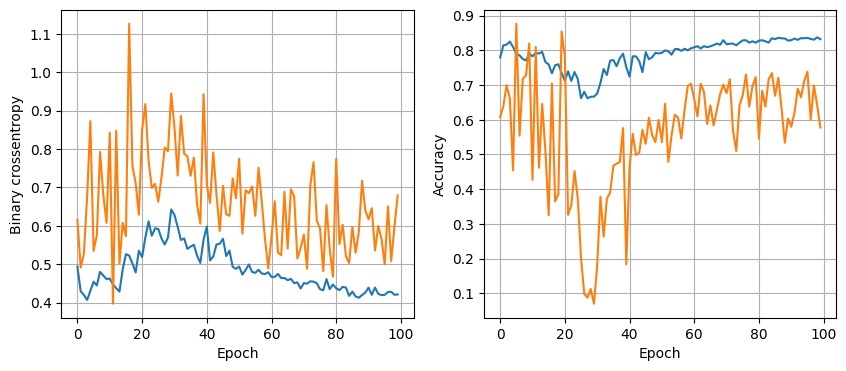

157/157 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.7851
64 nodes, dropout 0.2, lr 0.005, batch size 32, epochs 100


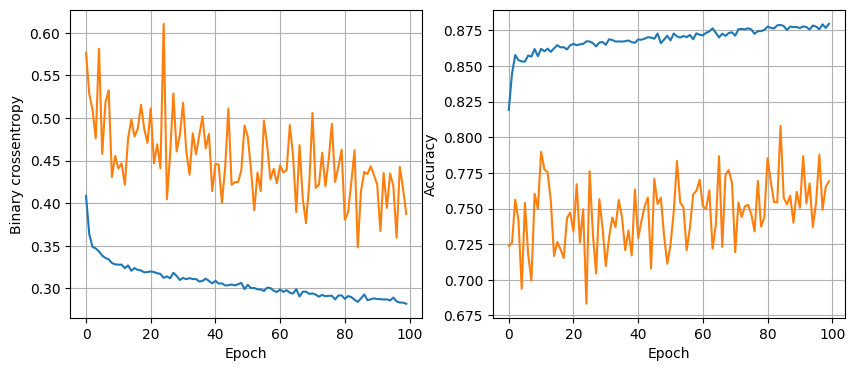

157/157 [==============================] - 0s 3ms/step - loss: 0.3259 - accuracy: 0.8562
64 nodes, dropout 0.2, lr 0.005, batch size 64, epochs 100


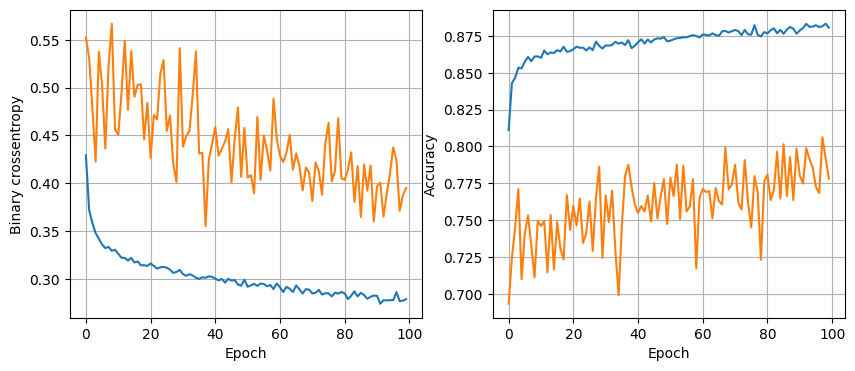

157/157 [==============================] - 1s 3ms/step - loss: 0.3290 - accuracy: 0.8568
64 nodes, dropout 0.2, lr 0.005, batch size 128, epochs 100


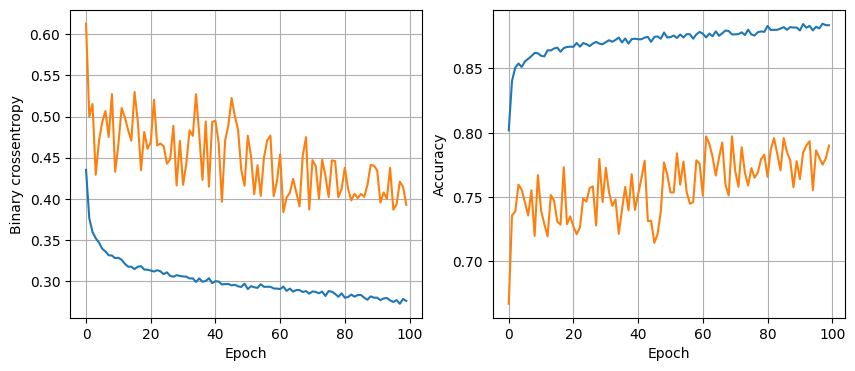

157/157 [==============================] - 0s 3ms/step - loss: 0.3168 - accuracy: 0.8586
64 nodes, dropout 0.2, lr 0.001, batch size 32, epochs 100


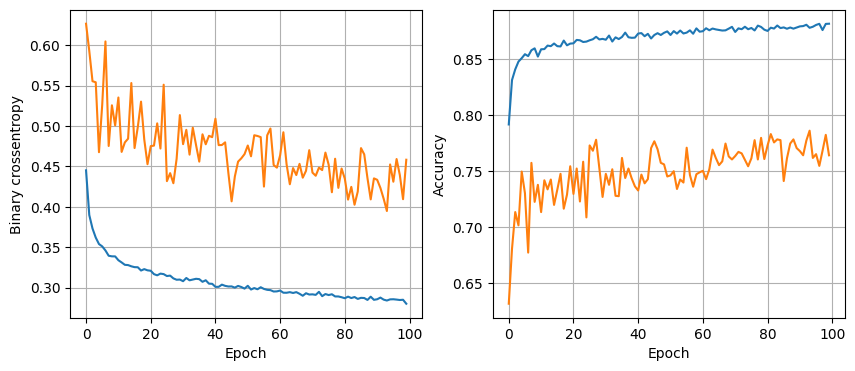

157/157 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8626
64 nodes, dropout 0.2, lr 0.001, batch size 64, epochs 100


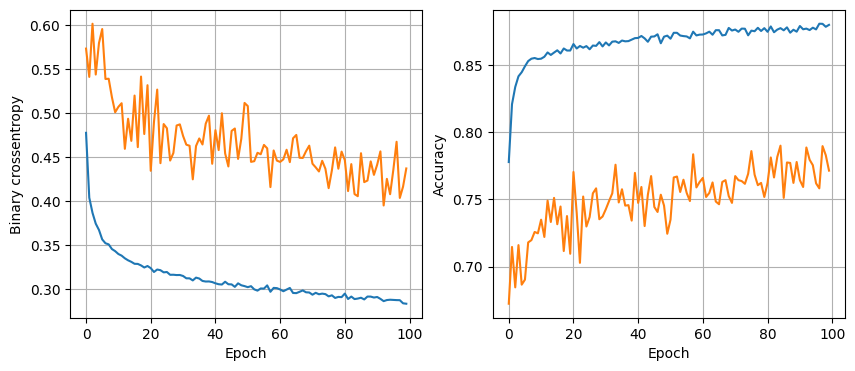

157/157 [==============================] - 0s 3ms/step - loss: 0.3117 - accuracy: 0.8650
64 nodes, dropout 0.2, lr 0.001, batch size 128, epochs 100


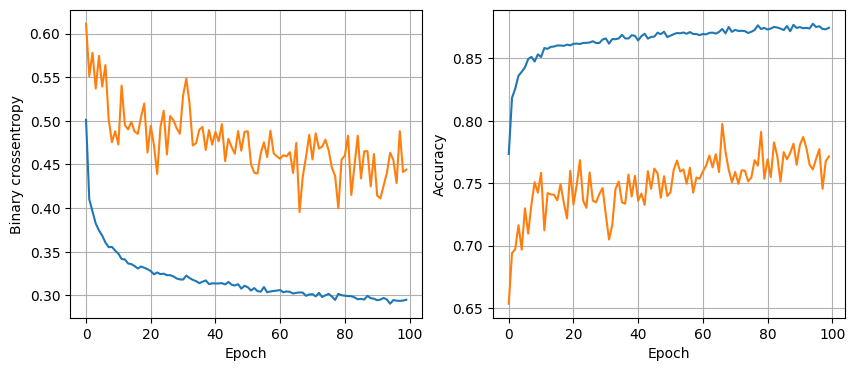

157/157 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8582


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.1, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}, epochs {epochs}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_loss(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]  # Use evaluate, not evaluation
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model


In [ ]:
y_pred = least_loss_model.predict(X_test)

y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 1s 6ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1363
           1       0.86      0.95      0.90      2441

    accuracy                           0.87      3804
   macro avg       0.88      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804

